In [1]:
from IPython.display import clear_output, display
%cd ..
!pip install -e .
from microecon.curves import *
from microecon.equilibrium import *

# for plotting
import matplotlib.pyplot as plt
from bokeh.plotting import show, save, output_file, output_notebook
clear_output()

# Overview

This package supports

# Production Possibility Frontiers

<Axes: xlabel='Guns', ylabel='Butter'>

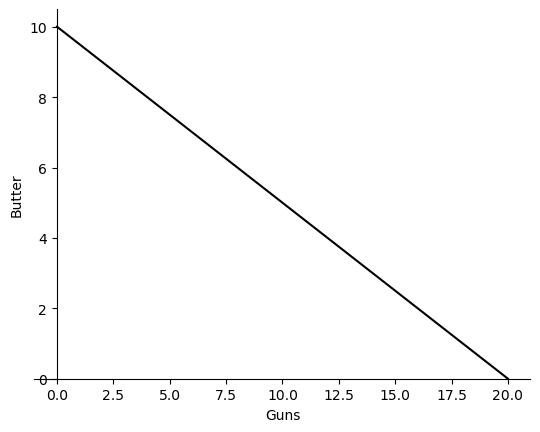

In [2]:
# Create a PPF with the microecon.curves.PPF class

ppf1 = PPF.from_points([(0,10), (20,0)])
ppf1.plot(xlabel = 'Guns', ylabel = 'Butter')

<Axes: xlabel='Guns', ylabel='Butter'>

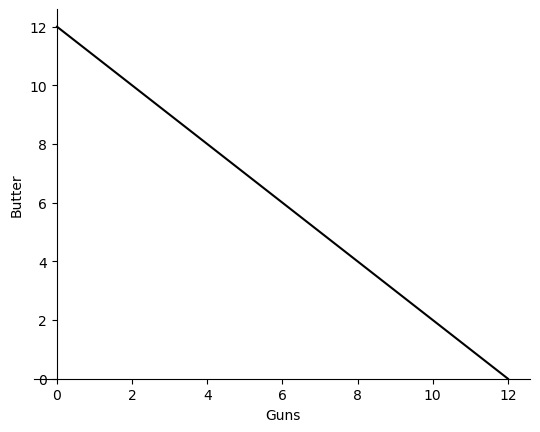

In [3]:
# Define PPF from formula
# quirk: the RHS variable always needs a coefficient
# 12-x would not work.

ppf2 = PPF.from_formula("Y = 12 - 1x")
ppf2.plot(xlabel = 'Guns', ylabel = 'Butter')

In [4]:
# Combine PPFs with the addition operator

joint_ppf = ppf2 + ppf1

<Axes: xlabel='Good 1', ylabel='Good 2'>

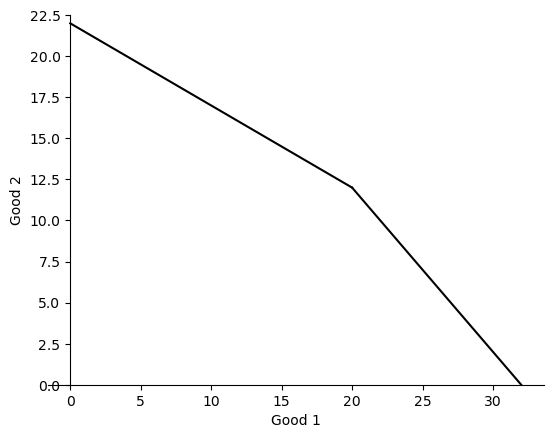

In [5]:
joint_ppf.plot()

<Axes: xlabel='Good 1', ylabel='Good 2'>

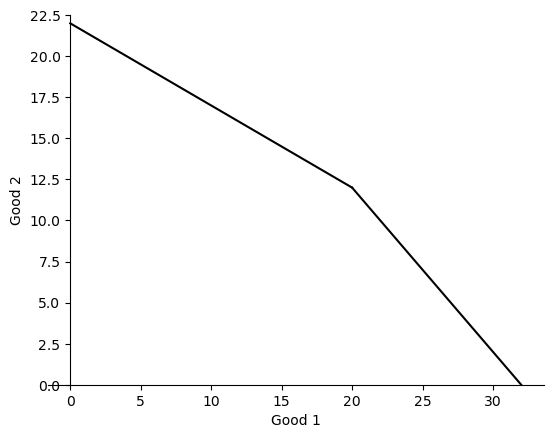

In [6]:
# order doesn't matter
joint_ppf = ppf1 + ppf2
joint_ppf.plot()

In [7]:
# create bokeh figure
p = joint_ppf.plot(backend='bokeh')
show(p)

# Demand and Supply

In [8]:
d1 = Demand.from_formula("Q = 12 - 2P")
d2 = Demand.from_formula("P = 16 - 0.5q")

In [9]:
d2

In [10]:
d1

In [11]:
d1.inverse_equation

<IPython.core.display.Latex object>

In [12]:
d2.inverse_equation

<IPython.core.display.Latex object>

<Axes: xlabel='Quantity', ylabel='Price'>

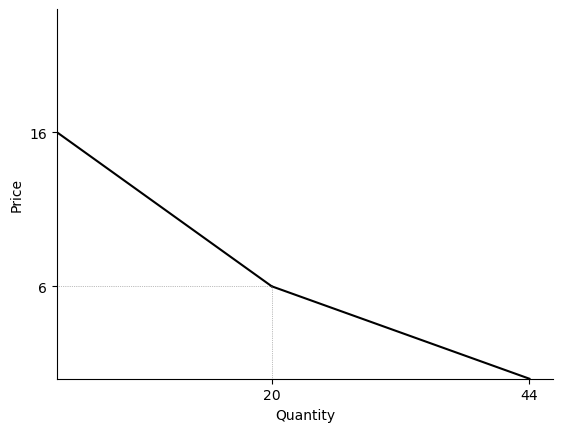

In [13]:
d = d1 + d2

d.plot()

In [14]:
for demand in d, d1, d2:
    print(demand.consumer_surplus(4))

148.0
4.0
144.0


<Axes: xlabel='Quantity', ylabel='Price'>

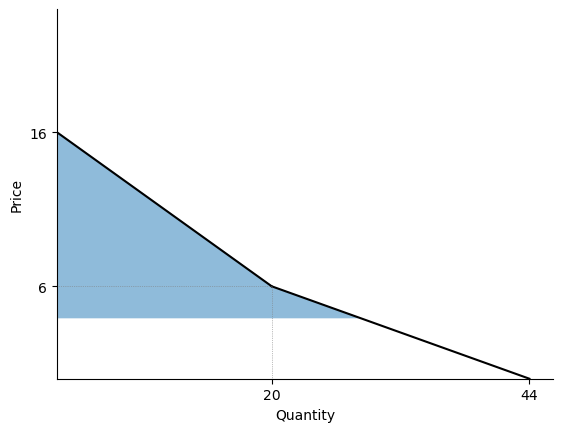

In [15]:
d.plot_surplus(p=4)

<Axes: xlabel='Quantity', ylabel='Price'>

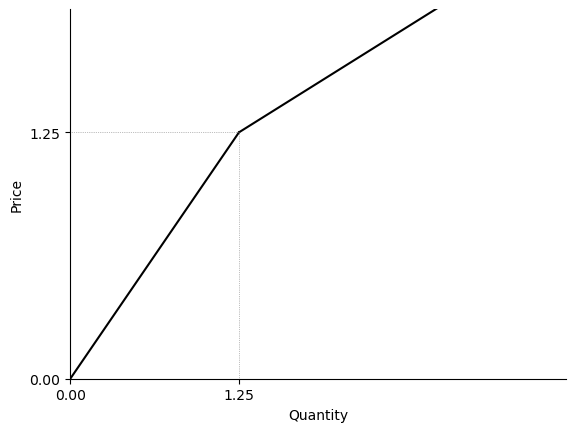

In [16]:
s1 = Supply.from_formula('p = q')
s2 = Supply.from_two_points(1, 2, 5, 5)
s = s1 + s2

s.plot()

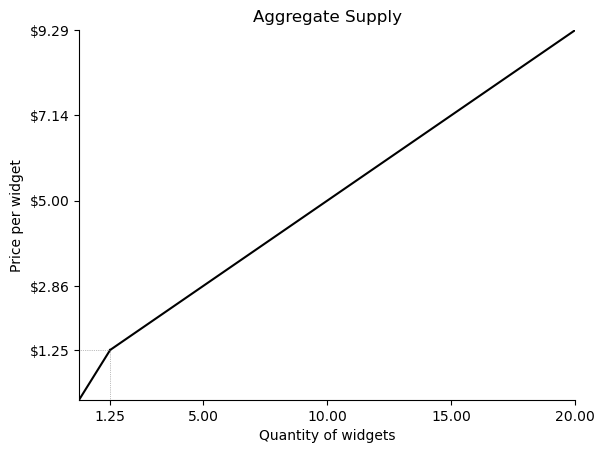

In [17]:
# Customized Plot

ax = s.plot(title='Aggregate Supply', max_q=20)

# Label
plt.xlabel("Quantity of widgets")
plt.ylabel("Price per widget")

plt.xlim(0,20)
plt.ylim(0, s.p(q=20))

# Redo ticks
xticks = [1.25, 5, 10, 15, 20]
yticks = [s.p(q) for q in xticks]
plt.xticks(xticks)
plt.yticks(yticks)

# Add dollar sign for prices
ax.set_yticklabels([f"${p:.2f}" for p in yticks])

# Save vector image
plt.savefig("notebooks/supply.svg", transparent=True)
plt.show()

# Equilibrium

<Axes: xlabel='Quantity', ylabel='Price'>

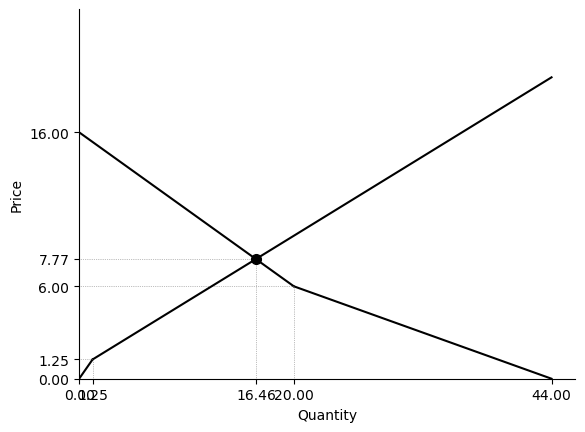

In [18]:
e = Equilibrium(d, s)

e.plot()

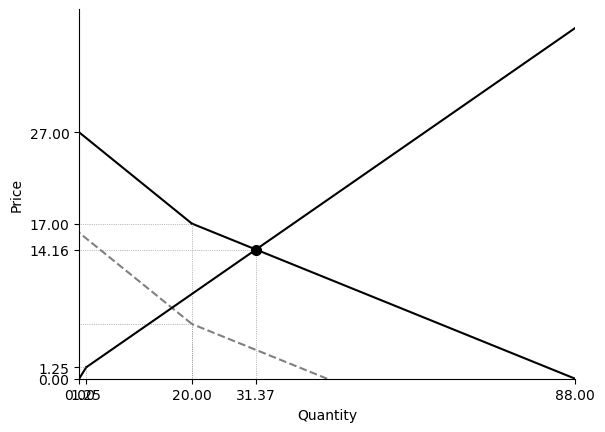

In [19]:
ax = d.plot(linestyle = 'dashed', color = 'gray')

# Shift demand out
d_shift = d.horizontal_shift(22, inplace=False)

e2 = Equilibrium(d_shift, s)

e2.plot(ax=ax)
plt.show()

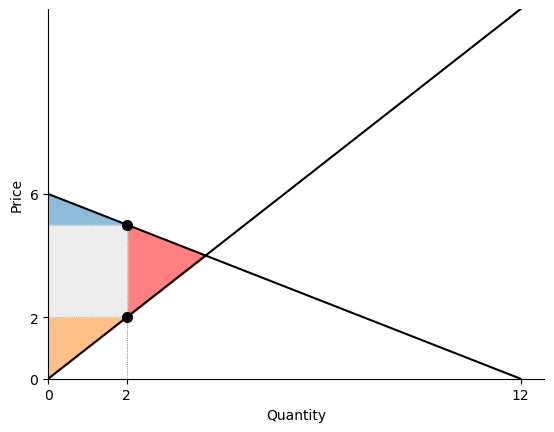

In [32]:
# Make a simpler equilibrium

e3 = Equilibrium(d1, s1)

#ax = e3.plot()
e3.tax = 3
ax = e3.plot()
e3.plot_surplus(ax)

In [34]:
e3.consumer_surplus

1.0

In [35]:
e3.producer_surplus

2.0

In [36]:
e3.total_surplus

3.0

In [37]:
e3.q

2.0